<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/SepLeetCodePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

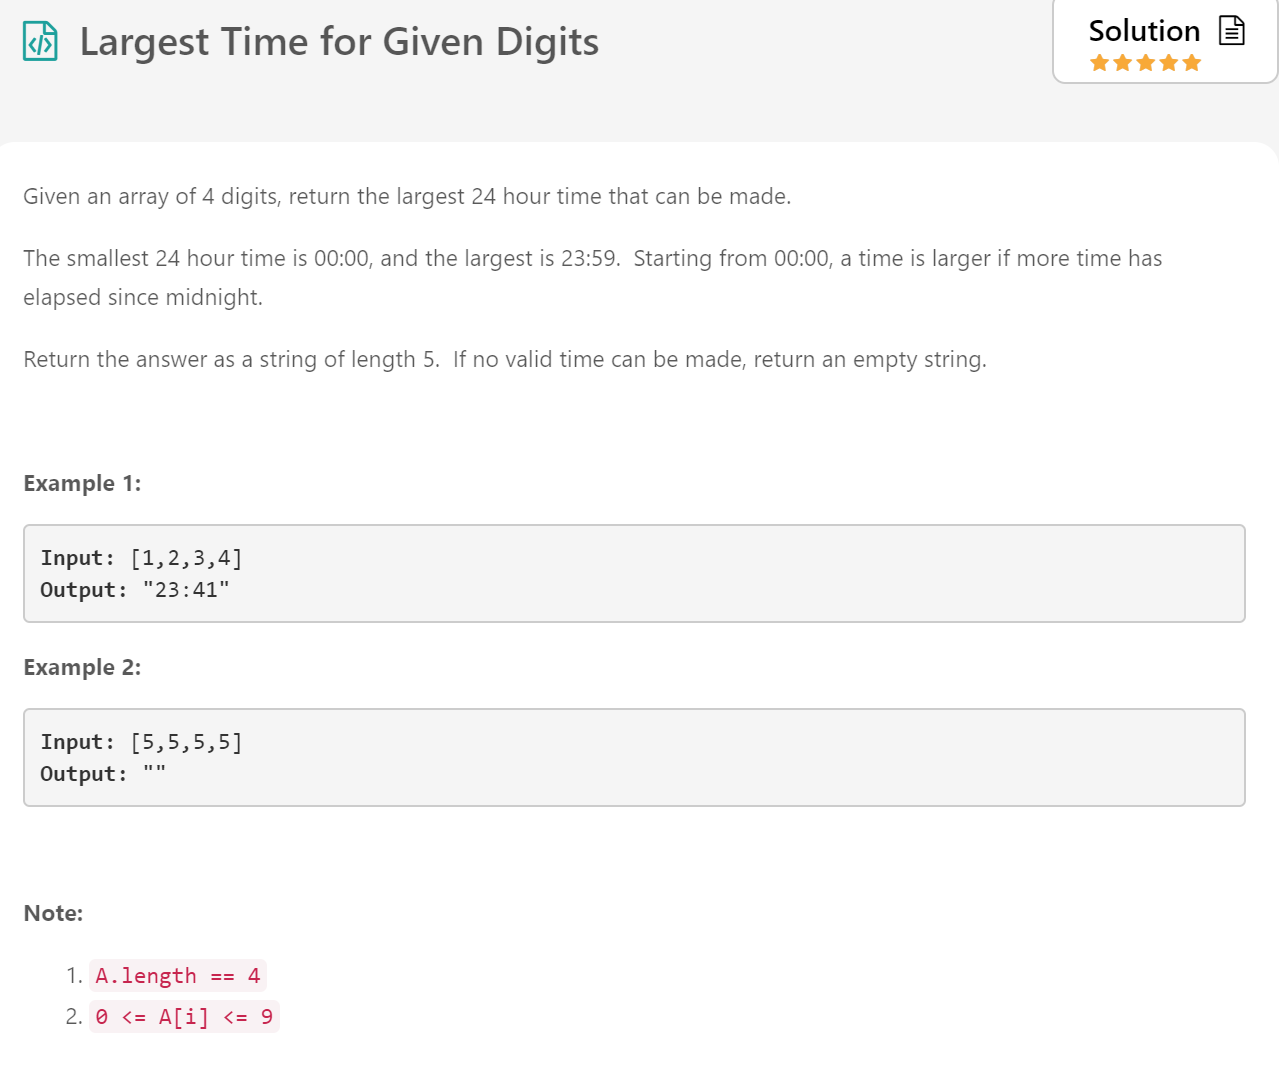

In [ ]:
# Sep 1, Largest Time for Given Digits
# my solution 
import itertools   
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:
        ret = ''
        temp = []   
        permu = list(itertools.permutations(A))
        
        # get all validated combination
        for num in permu:
            hr = num[0]*10 + num[1]
            mn = num[2]*10 + num[3]
            if hr >= 0 and hr < 24 and mn >= 0 and mn <= 59:
                temp.append([hr*100 + mn, str(hr), str(mn)])
        if temp:
            t = max(temp,key = lambda num: num[0])
            print(t)
            if len(t[1]) < 2:
                t[1] = '0' +  t[1]
            if len(t[2]) < 2:
                t[2] = '0' +  t[2]
            ret =  t[1] + ':' + t[2]
            
        return ret   

# leet code Approach 1, Enumerate the Permutations
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:
        
        max_time = -1
        # enumerate all possibilities, with the permutation() func
        for h, i, j, k in itertools.permutations(A):
            hour = h*10 + i
            minute = j*10 + k
            if hour < 24 and minute < 60:
                max_time = max(max_time, hour * 60 + minute)
        
        if max_time == -1:
            return ""
        else:
            return "{:02d}:{:02d}".format(max_time // 60, max_time % 60)


# Approach 2: Permutation via Backtracking
class Solution:
    def largestTimeFromDigits(self, A: List[int]) -> str:

        max_time = -1

        def build_time(permutation):
            nonlocal max_time

            h, i, j, k = permutation
            hour = h*10 + i
            minute = j*10 + k
            if hour < 24 and minute < 60:
                max_time = max(max_time, hour * 60 + minute)

        def swap(array, i, j):
            if i != j:
                array[i], array[j] = array[j], array[i]

        def permutate(array, start):
            if start == len(array):
                build_time(array)
                return

            for index in range(start, len(array)):
                swap(array, index, start)
                # repeat the permutation with the original array mutated
                permutate(array, start+1)
                swap(array, index, start)

        permutate(A, 0)
        if max_time == -1:
            return ""
        else:
            return "{:02d}:{:02d}".format(max_time // 60, max_time % 60)


# reference : https://leetcode.com/problems/largest-time-for-given-digits/solution/

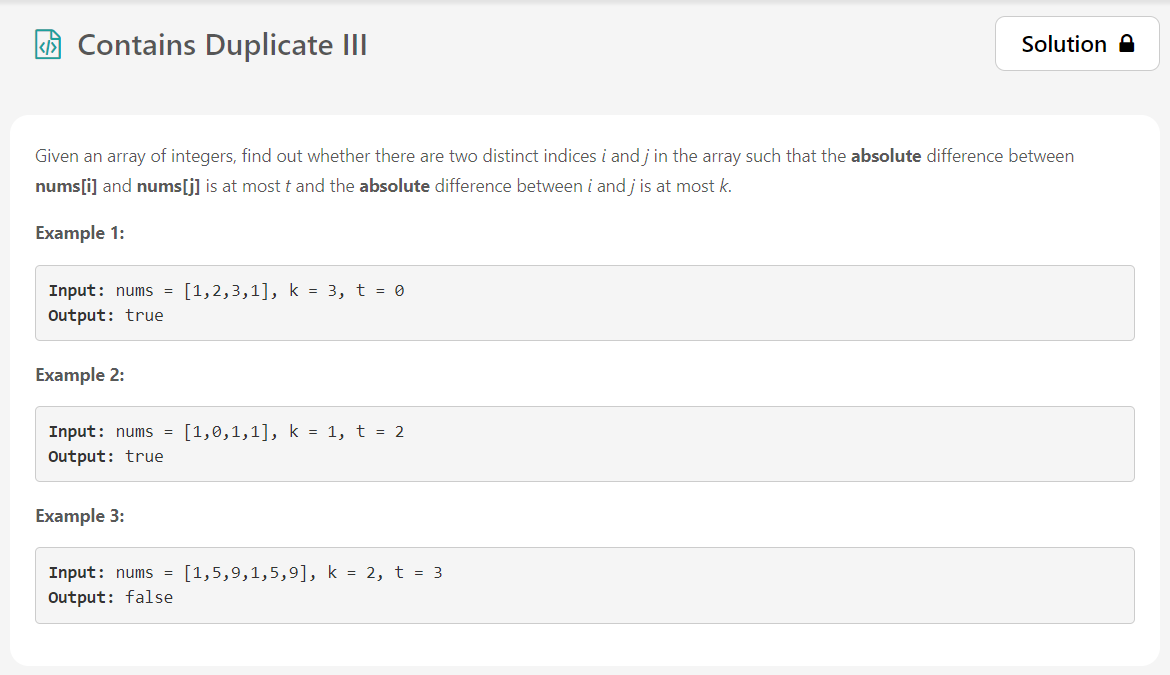

In [ ]:
''' September 2nd Contains Duplicate III

Hint #1  
Time complexity O(n logk) - This will give an indication that sorting is involved for k elements.

Hide Hint #2  
Use already existing state to evaluate next state - Like, a set of k sorted numbers are only needed to be tracked. 
When we are processing the next number in array, then we can utilize the existing sorted state and it is not necessary to sort next overlapping set of k numbers again.

'''
class Solution:
    def containsNearbyAlmostDuplicate(self, nums: List[int], k: int, t: int) -> bool:
        if k <= 0 or t < 0:
            return False
        
        mydic = {} # map from the dict to num in the dict
        
        for i, num in enumerate(nums):
            tmp = num // (t + 1)
            if tmp in mydic:
                return True
            if tmp + 1 in mydic and abs(num - mydic[tmp + 1]) <= t:
                return True
            if tmp - 1 in mydic and abs(num - mydic[tmp - 1]) <= t:
                return True
            
            mydic[tmp] = num
            if i - k >= 0:
                ex_tmp = nums[i - k] // (t + 1)
                del mydic[ex_tmp]
                
        return False



In [ ]:
''' September 3rd 
Repeated Substring Pattern

Given a non-empty string check if it can be constructed by taking a substring of it 
and appending multiple copies of the substring together.
 You may assume the given string consists of lowercase English letters only and its length will not exceed 10000.
 
Example 1:
Input: "abab"
Output: True
Explanation: It's the substring "ab" twice.

Example 2:
Input: "aba"
Output: False

Example 3:
Input: "abcabcabcabc"
Output: True

Explanation: It's the substring "abc" four times. (And the substring "abcabc" twice.)
'''

class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        s_len = len(s)
        # loop from the half length of the string to 1
        for i in range (s_len//2,0,-1):
            if s_len % i == 0:
                repeat_times = s_len // i
                # divisible
                sub_str = s[:i]
                # rebuild the string
                str_rebuild = "".join([sub_str]*repeat_times)   
                # print(str_rebuild)
                if str_rebuild == s:
                    return True 
        return False


### fastest submssion 

class Solution:
    def repeatedSubstringPattern(self, s: str) -> bool:
        ss = (s + s)[1:-1]
        print(ss)
        print(s)
        return ss.find(s) != -1

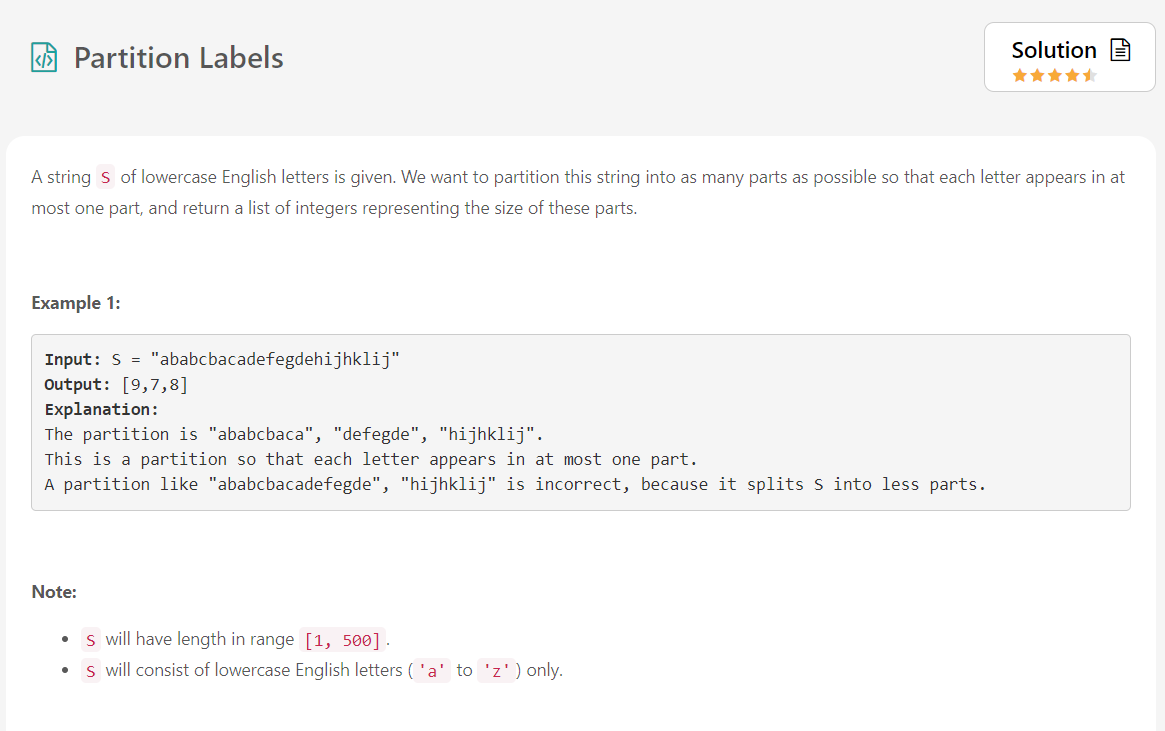

In [ ]:
''' Leetcode September  4th Partition Labels

# using the 2 pointer, figure the rightmost index first with the python dict, 
then use it to denote the start of the next section
# reset the left pointer at the start of each section 
# continue the search by updating the left pointer 
'''
class Solution:
    def partitionLabels(self, S: str) -> List[int]:
        if S is None or len(S) == 0: return None
        
        ret_arr = []
        # a dict last_occur store the right most character in the string 
        last_occur = {c:i for i,c in enumerate(S)}
    
        left, right = 0,0 
        for i, char in enumerate(S):
            
            right = max(right,last_occur[char]) # the longest substring
            
            if i == right:
                ret_arr += [right - left + 1]
                left = i + 1
        
        
        return ret_arr

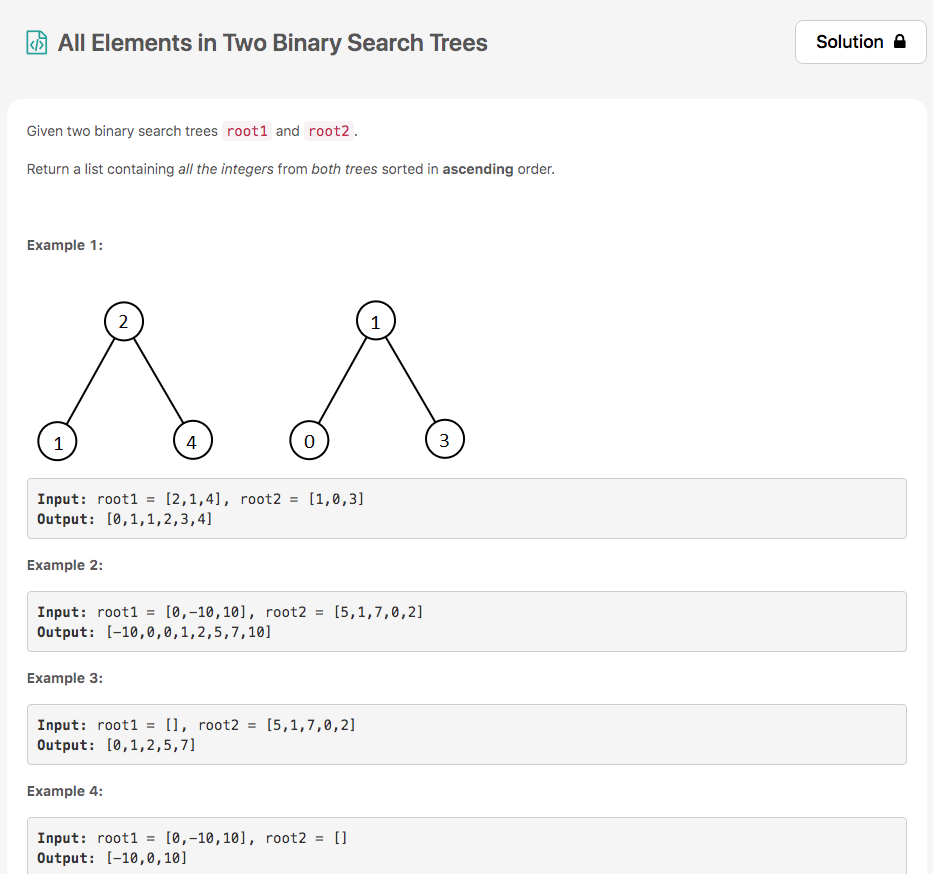

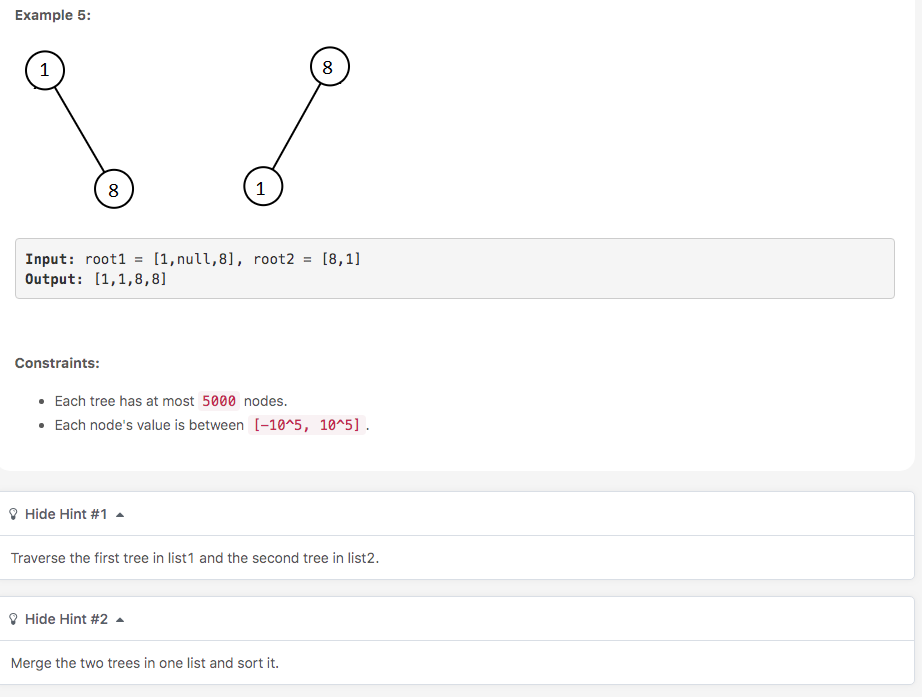

In [ ]:
'''Leet code September 5 All Elements in Two Binary Search Trees '''
#  Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def getAllElements(self, root1: TreeNode, root2: TreeNode) -> List[int]:
        arr = []
        def helper(node : TreeNode):
            if not node: return
            arr.append(node.val)
            helper(node.left)
            helper(node.right)
        helper(root1)
        helper(root2)
        return sorted(arr)



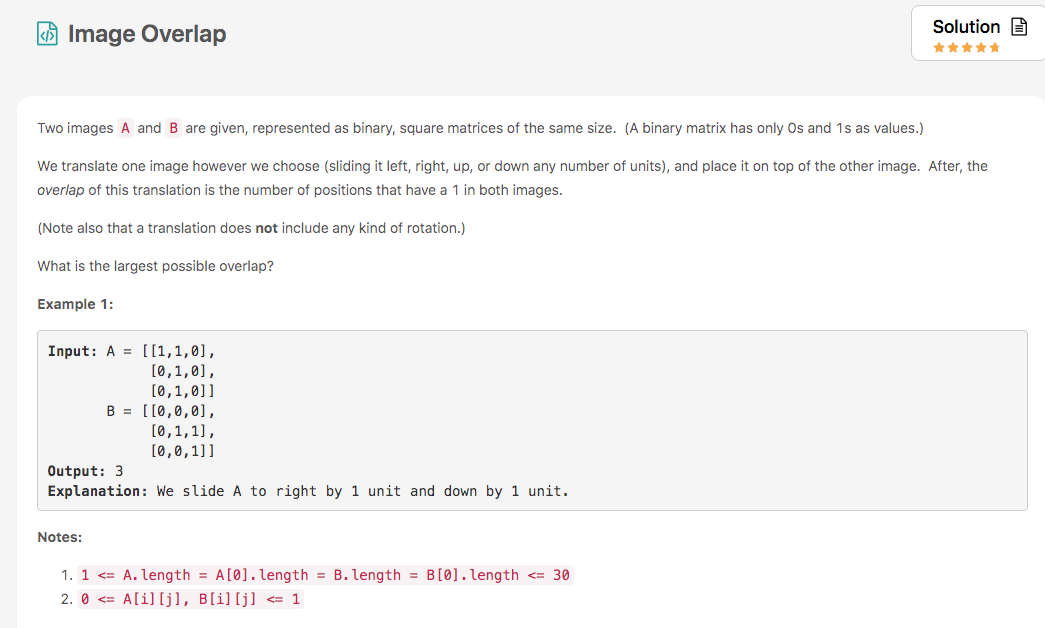

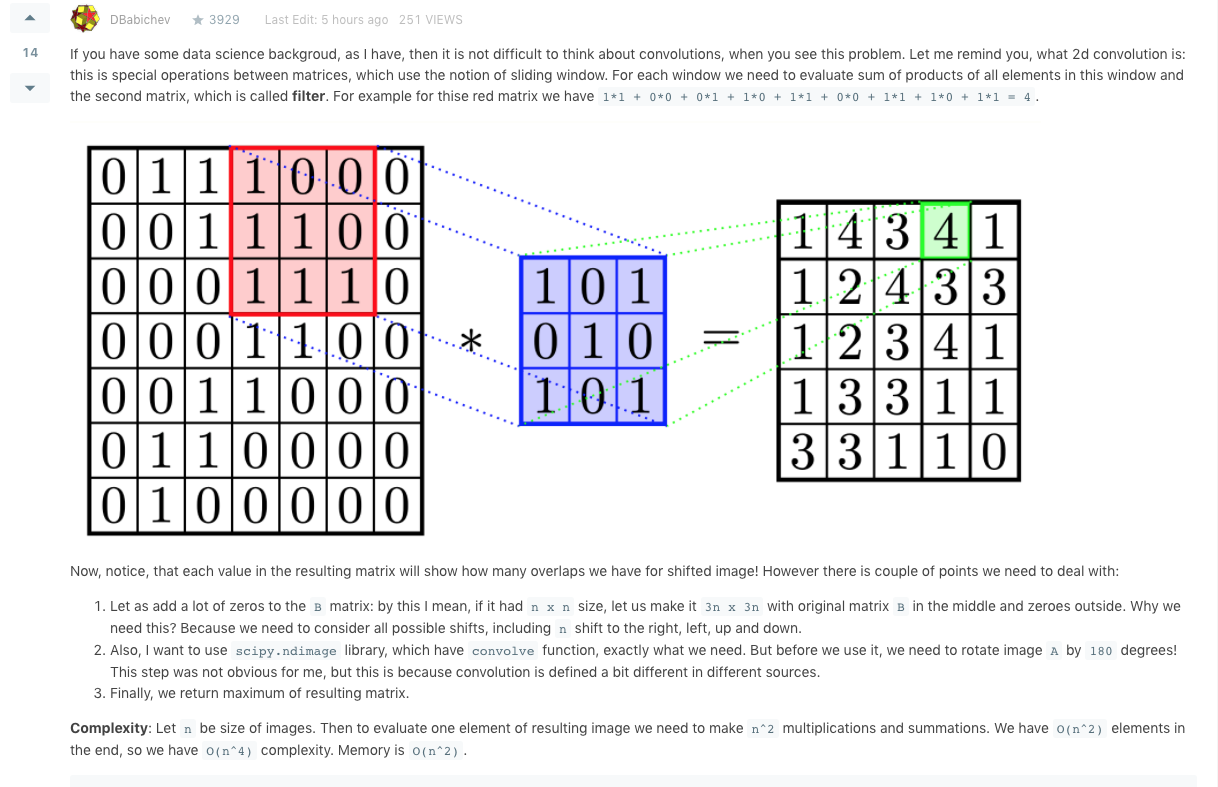

In [ ]:
'''Leetcode challenge September 6th Image Overlap
Note to myself, this quesion is diffcult, need to review '''
# https://leetcode.com/problems/image-overlap/solution/ 
# reference:  https://leetcode.com/problems/image-overlap/discuss/832150/Python-2-lines-using-convolutions-explained

from scipy.ndimage import convolve
import numpy as np

class Solution:
    def largestOverlap(self, A, B):
        B = np.pad(B, len(A), mode='constant', constant_values=(0, 0))
        return np.amax(convolve(B, np.flip(np.flip(A,1),0), mode='constant'))

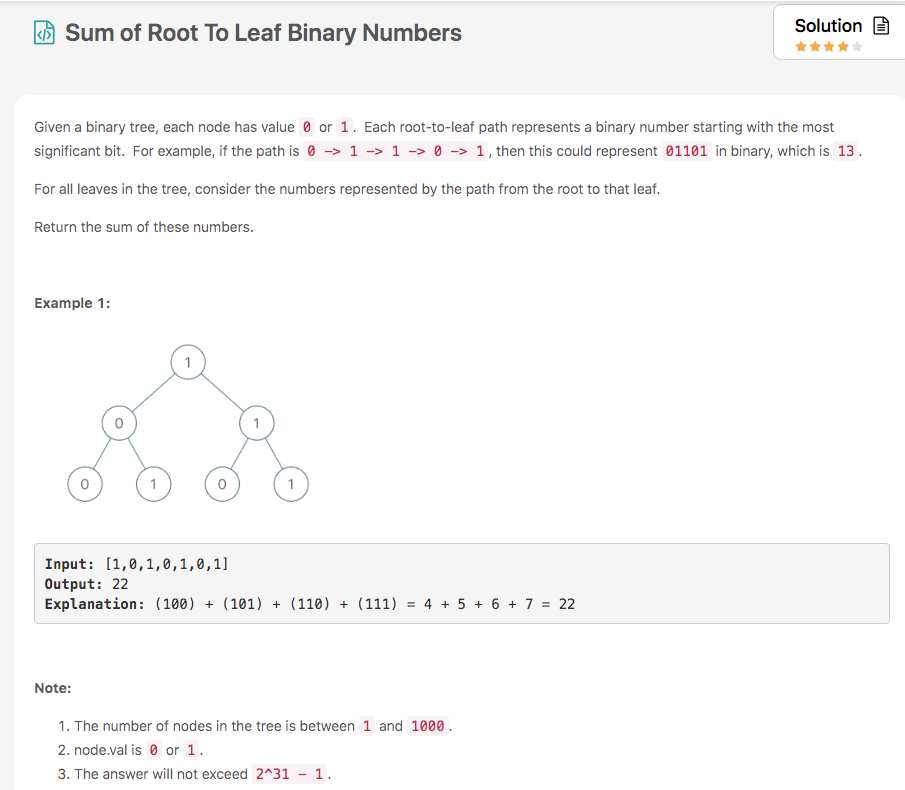

In [ ]:
""" September 8th Sum of Root To Leaf Binary Numbers

Given a binary tree, each node has value 0 or 1.  Each root-to-leaf path represents a binary number starting with the most significant bit.  For example,
if the path is 0 -> 1 -> 1 -> 0 -> 1, then this could represent 01101 in binary, which is 13.
For all leaves in the tree, consider the numbers represented by the path from the root to that leaf.

Return the sum of these numbers.


Example 1:
Input: [1,0,1,0,1,0,1]
Output: 22
Explanation: (100) + (101) + (110) + (111) = 4 + 5 + 6 + 7 = 22
 

Note:
The number of nodes in the tree is between 1 and 1000.
node.val is 0 or 1.
The answer will not exceed 2^31 - 1.
DFS with preorder trasvering

method 1"""
    # it's quite similar to find and return all the root-to-leaf paths
    # But this time we just need to return the decimal
	# O(logn) for time
	# and without taking the recursion space into account
	# we will have O(n) for additional space
    def dfs(node, path=None):
        if path == None:
            path = ''
        if node:
            path += str(node.val)
            if node.left or node.right:
                return dfs(node.left, path) + dfs(node.right, path)
            else:
                return int(path, 2)
        else:
            return 0
"""method 2 (recommended)"""
    # very similar to the implementation of method 1
	# but this time, we directly pass the parent sum instead of 
	# only calculate the decimal presentation in the leaf
	# O(logn) for time
	# and without taking the recursion space into account
	# we will have O(1) for additional space
    def dfs2(node, parent_sum=None):
        if parent_sum == None:
            parent_sum = 0
        if node:
            parent_sum = parent_sum * 2 + node.val
            if node.left or node.right:
                return dfs2(node.left, parent_sum) + dfs2(node.right, parent_sum)
            else:
                return parent_sum
        else:
            return 0

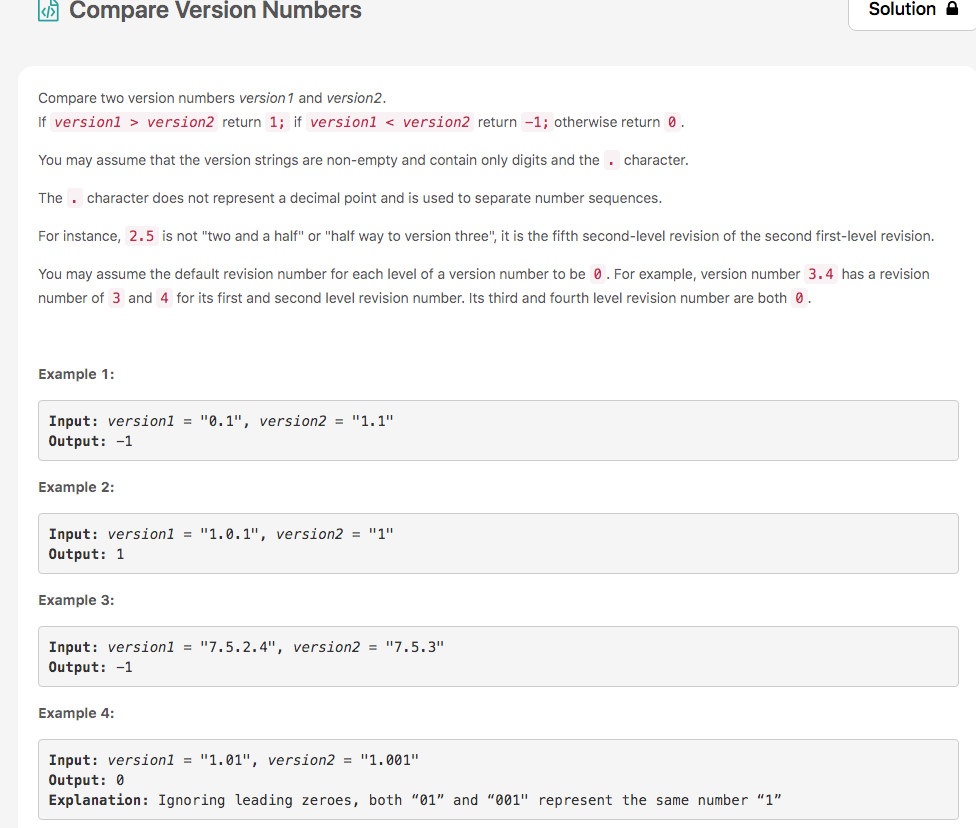

In [ ]:
''' September 9th Compare Version Numbers 

Example 5:
Input: version1 = "1.0", version2 = "1.0.0"
Output: 0

Explanation: The first version number does not have a third level revision number, 
which means its third level revision number is default to "0"
 
Note:
Version strings are composed of numeric strings separated by dots . 
and this numeric strings may have leading zeroes.
Version strings do not start or end with dots, and they will not be two consecutive dots.
Python3	
'''
class Solution:
    def compareVersion(self, version1: str, version2: str) -> int:
        # pad with [0] * length_difference
        ver1, ver2 = (list(map(int, ver.split('.'))) for ver in (version1, version2))
        d = len(ver2) - len(ver1)
        def cmp(a, b):
            return (a > b) - (a < b) 
        
        return cmp(ver1 + [0]*d, ver2 + [0]*-d)

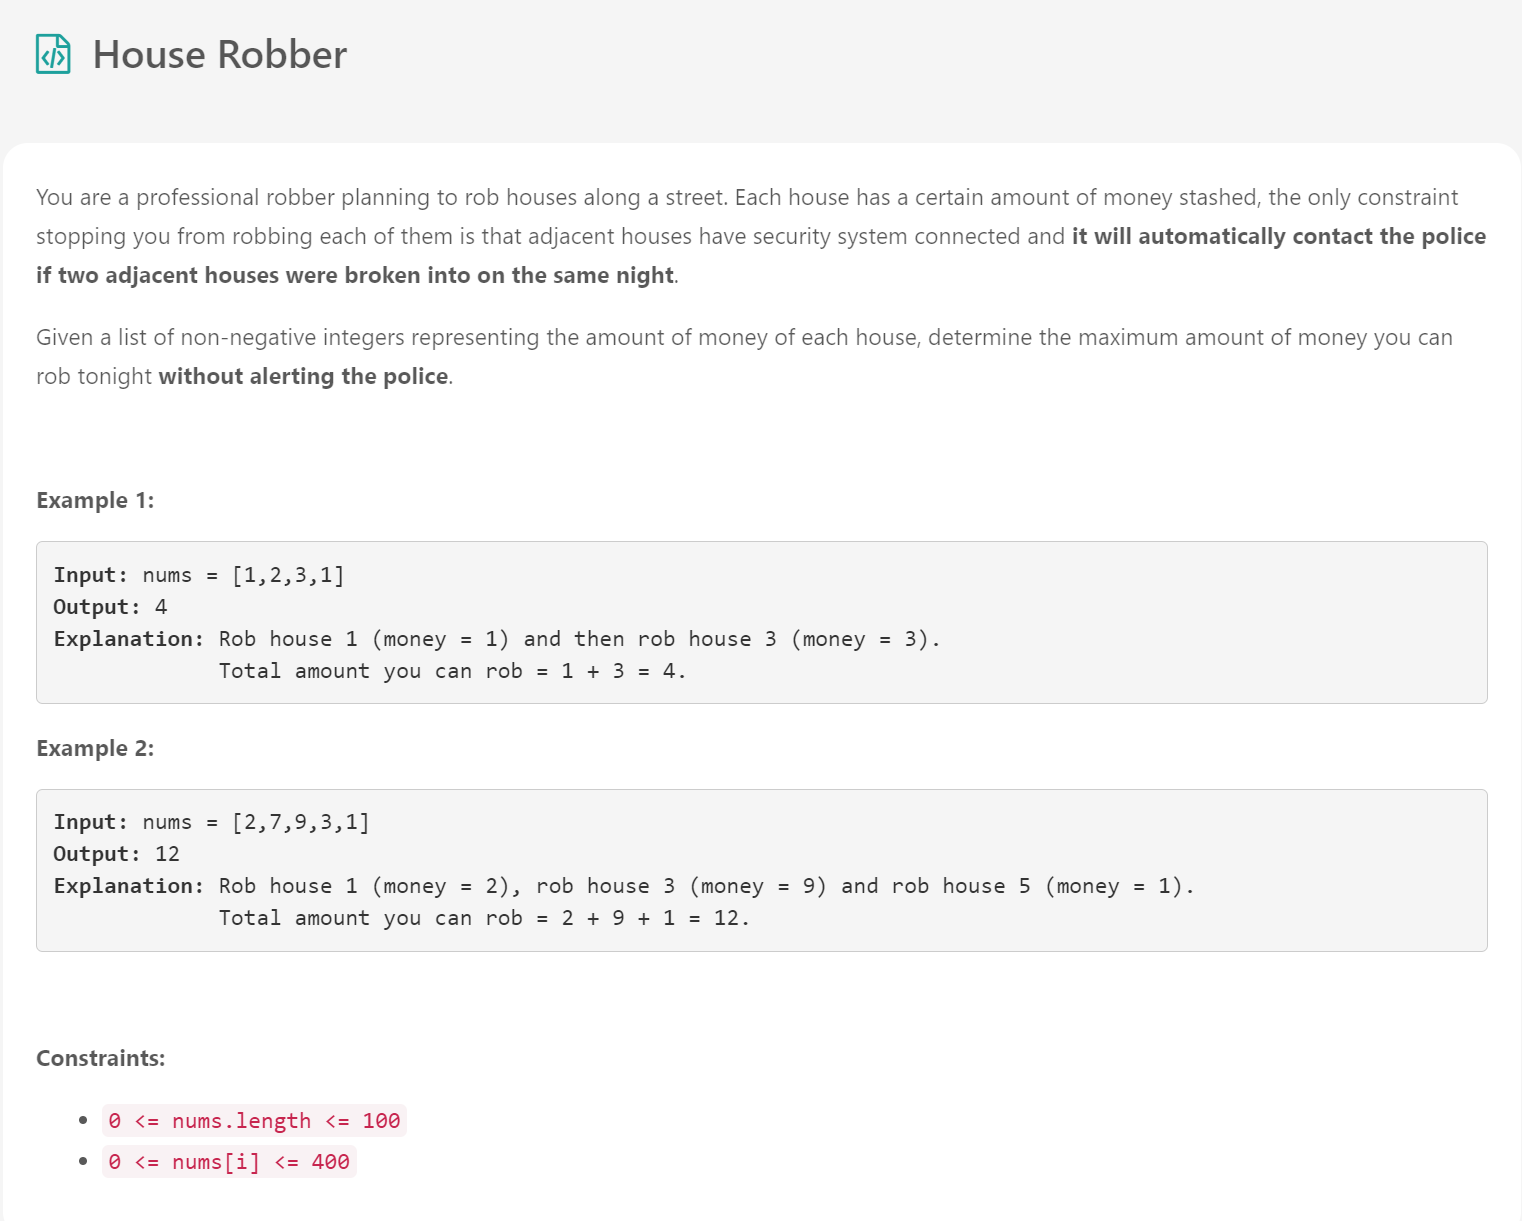

In [ ]:
''' Leetcode September 14. House Robber'''
class Solution(object):
  def rob(self, nums):
    # Base Case: nums[0] = nums[0]
    # nums[1] = max(nums[0], nums[1])
    # nums[k] = max(k + nums[k-2], nums[k-1])
    '''
    # Approach 1:- Construct dp table
    if not nums: return 0
    if len(nums) == 1: return nums[0]
    
    dp = [0] * len(nums)
    dp[0] = nums[0]
    dp[1] = max(nums[0], nums[1])
    for i in range(2, len(nums)):
      dp[i] = max(nums[i] + dp[i-2], dp[i-1])
    return dp[-1] # return the last element
    '''
    
    # Approach 2:- Constant space use two variables and compute the max respectively
    prev = curr = 0
    for num in nums:
      temp = prev # This represents the nums[i-2]th value
      prev = curr # This represents the nums[i-1]th value
      curr = max(num + temp, prev) # Here we just plug into the formula
    return curr
# Note that the three lines inside the loop can be written as prev, curr = curr, max(curr + prev, curr) due to python's elegant syntax

'''f(0) = nums[0]
f(1) = max(num[0], num[1])
f(k) = max( f(k-2) + nums[k], f(k-1) )'''
class Solution:
    
    def rob(self, nums):
        
        last, now = 0, 0
        
        for i in nums: last, now = now, max(last + i, now)
                
        return now

In [ ]:
'''Sep 15th Length of Last Word

Given a string s consists of upper/lower-case alphabets and empty space characters ' ',
return the length of last word (last word means the last appearing word if we loop from left to right) in the string.
If the last word does not exist, return 0.

Note: A word is defined as a maximal substring consisting of non-space characters only.

Example:
Input: "Hello World"
Output: 5'''

class Solution:
    def lengthOfLastWord(self, s: str) -> int:
        ret = ''
        for c in reversed(s):
            if c == ' ' and ret:
                return len(ret)
                break
            if c != ' ':
                ret += c
            
        return len(ret) if ret else 0

# fastest submission 
import re
class Solution:
    def lengthOfLastWord(self, s: str) -> int:
        if not s or len(s) == 0:
            return 0
        return len(re.split('\s+', s.strip())[-1])

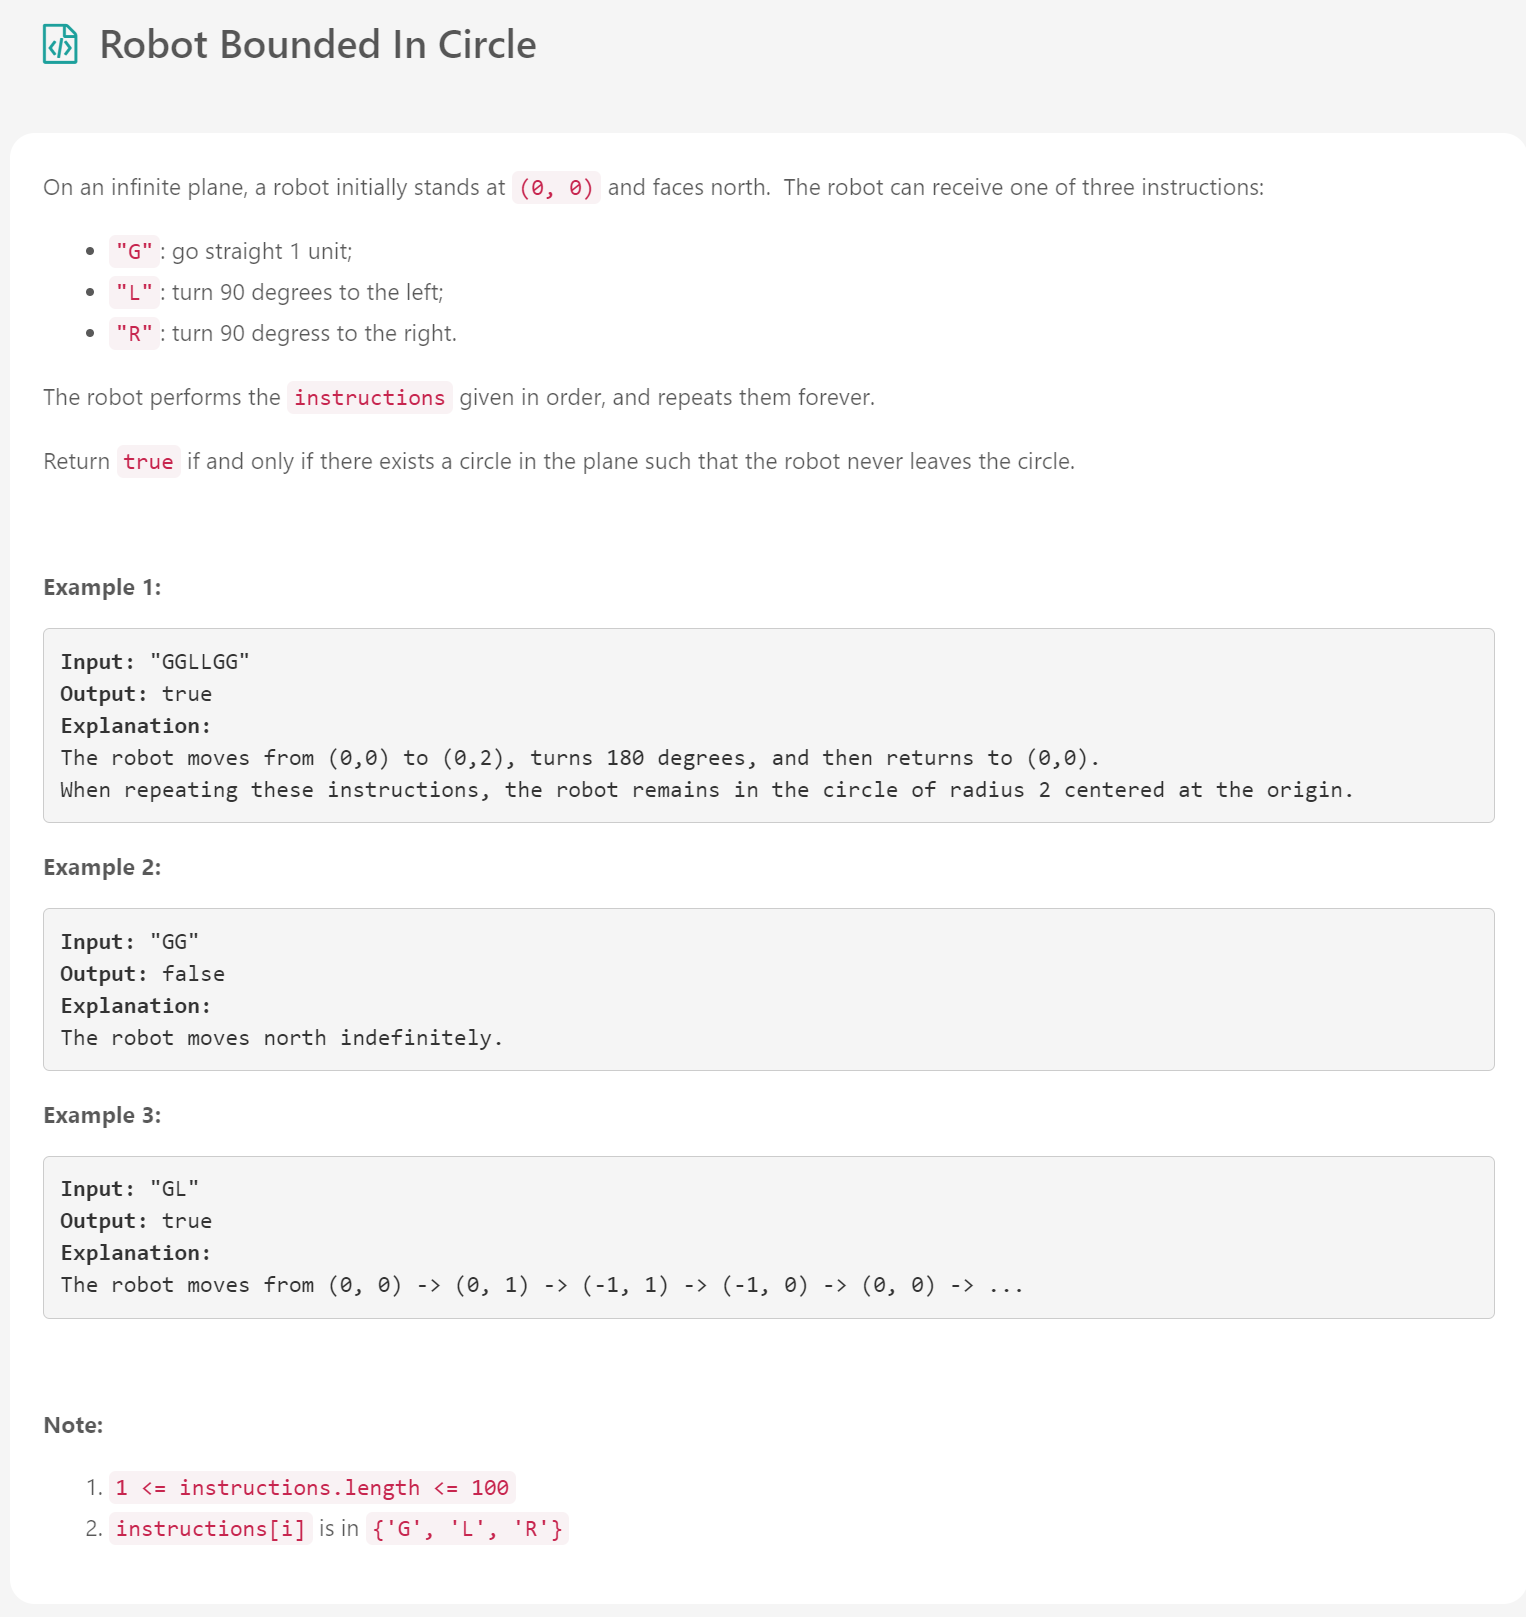

In [ ]:
''' September 17 Robot Bounced in circle 
The minimum number of instructions you need to repeat is 4 in order to figure out if you're in a cycle.

For example, if each instruction only rotates 90 degrees, you need to repeat the instructions 4 times to possibly end where you start.
If each instruction rotates 180 degrees, you need to repeat the instructions 2 times to possibly end where you start.
If each instruction rotates 270 degrees, you need to repeat the instruction 4 times to possibly end where you start.
'''
class Solution:
    def isRobotBounded(self, instructions: str) -> bool:
        #up, left, down, right
        directions, start, d = ([-1, 0], [0, -1], [1, 0], [0, 1]), [0,0], 0
        for i in range(4):
            for x in instructions:
                if x == "G":
                    start[0] += directions[d][0]
                    start[1] += directions[d][1]
                if x == "L": d = (d + 1) % 4 
                if x == "R": d = (d - 1) % 4
        return True if start == [0,0] else False 


